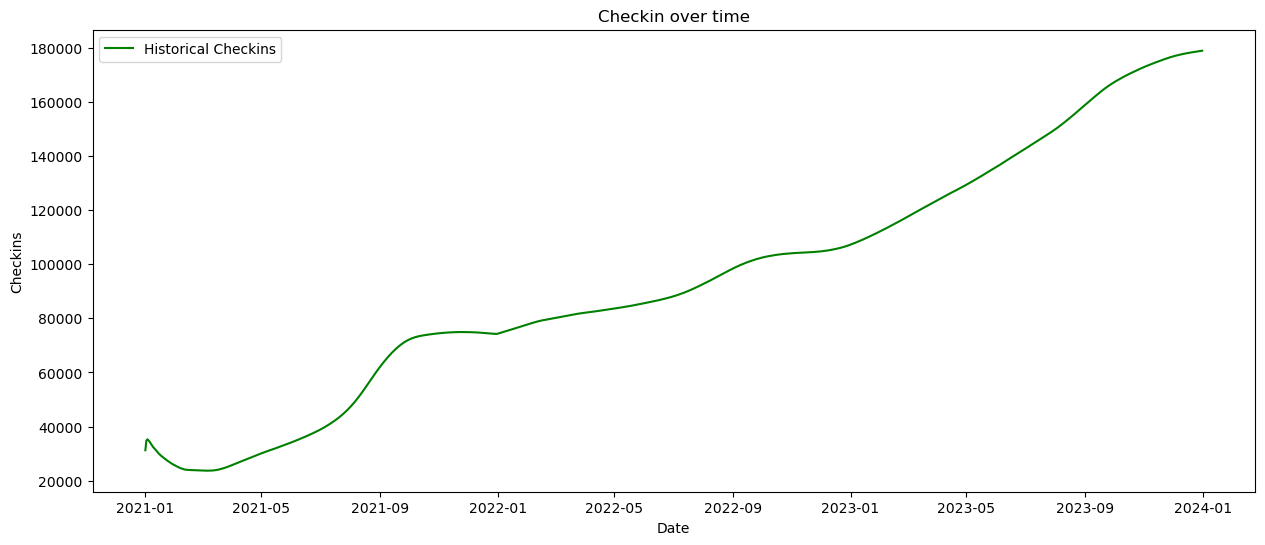

DataFrame with Prediction Column:
                Checkins   Prediction
Date                                 
2021-01-01   31237.21942  74442.53389
2021-01-02   34736.65354  74537.30661
2021-01-03   35259.86442  74638.45046
2021-01-04   34998.10658  74742.22344
2021-01-05   34570.37461  74849.97810
...                  ...          ...
2023-12-27  178706.27790          NaN
2023-12-28  178762.71470          NaN
2023-12-29  178819.10760          NaN
2023-12-30  178870.67640          NaN
2023-12-31  178921.23510          NaN

[1095 rows x 2 columns]

Scaled Feature Matrix X:
[[-1.42971873]
 [-1.35005261]
 [-1.33814149]
 ...
 [ 1.93004655]
 [ 1.93122054]
 [ 1.93237153]]

Model Confidence on Test Set: 0.8532119189497577

Predicted checkins for the Forecast Period:
[159463.3271091  159609.35289409 159757.98825122 159908.20567103
 160062.41587401 160220.61612569 160380.29956113 160540.14870625
 160699.78828058 160859.8227143  161022.90883141 161188.26708541
 161356.59061314 161526.6504284  16

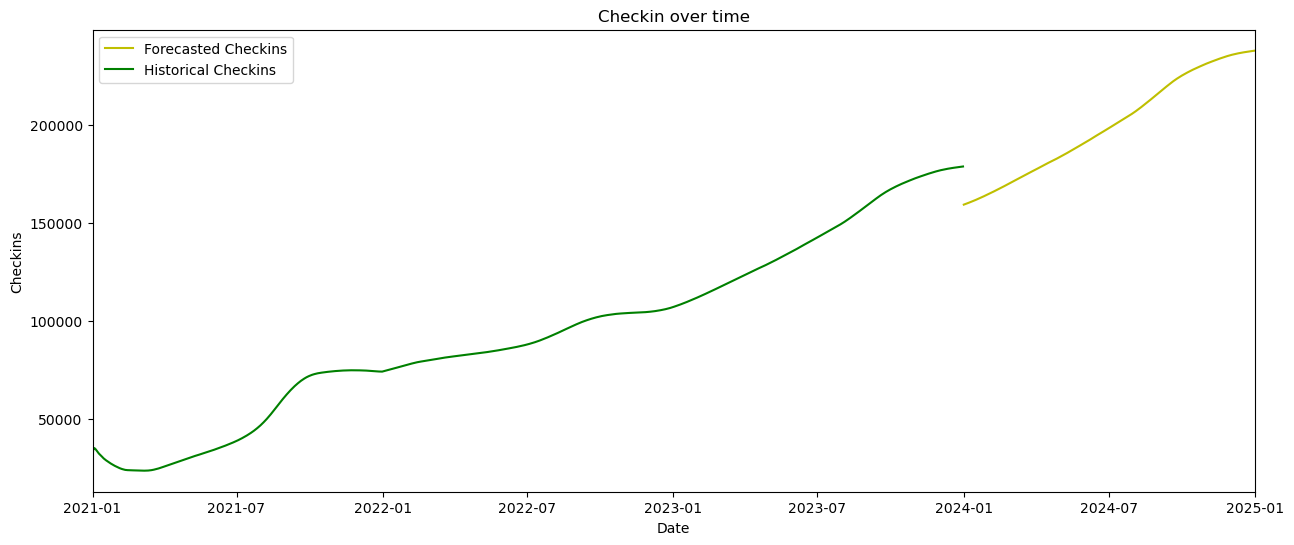

73211096.8771773


In [3]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

# Retrieve Checkins Hotelbeds data
df = pd.read_csv('/Users/joaquinalmiron/Desktop/checkins.csv')

# Convert 'Date' column to datetime and then to date
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Plot the historical 'Checkins' data
plt.figure(figsize=(15, 6))
df['Checkins'].plot(color='g', label='Historical Checkins')
plt.title('Checkin over time')
plt.xlabel('Date')
plt.ylabel('Checkins')
plt.legend(loc='upper left')
plt.show()

# Create a 'Prediction' column by shifting 'Checkins' values
forecast = 366
df['Prediction'] = df['Checkins'].shift(-forecast)

# Display the DataFrame with the 'Prediction' column
print("DataFrame with Prediction Column:")
print(df)

# Prepare the feature matrix X by scaling the features
X = np.array(df.drop(['Prediction'], axis=1))
X = preprocessing.scale(X)

# Display the scaled feature matrix X
print("\nScaled Feature Matrix X:")
print(X)

# Separate features and labels for training and testing
X_forecast = X[-forecast:]
X = X[:-forecast]
y = np.array(df['Prediction'])
y = y[:-forecast]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Linear Regression model
clf = LinearRegression()

# Fit the model on training data
clf.fit(X_train, y_train)

# Evaluate model confidence on the test set
confidence = clf.score(X_test, y_test)
print("\nModel Confidence on Test Set:", confidence)

# Predict checkins for the forecast period
forecast_predicted = clf.predict(X_forecast)
print("\nPredicted checkins for the Forecast Period:")
print(forecast_predicted)

# Generate dates for the forecast period
dates = pd.date_range(start='2024-01-01', end='2024-12-31')
print("\nDates for the Forecast Period:")
print(dates)

# Plot the predicted stock prices along with historical prices
plt.figure(figsize=(15, 6))
plt.plot(dates, forecast_predicted, color='y', label='Forecasted Checkins')
df['Checkins'].plot(color='g', label='Historical Checkins')
plt.title('Checkin over time')
plt.xlabel('Date')
plt.ylabel('Checkins')
plt.legend(loc='upper left')
plt.xlim(xmin=datetime.date(2021, 1, 1),xmax=datetime.date(2025,1,1))
plt.show()
print(sum(forecast_predicted))